In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score  
#kütüphaneler yüklendi

In [30]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

# İlk satırlar 
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [31]:
print(data.info())

# sayısal ve kategorik sütun kontrolü 
print(data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [32]:
print(data.isnull().sum()) #eksik veri kontrolü

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [33]:
# Sayısal verilerin seçimi (sadece V1-V28 ve Amount, Class sütunları dahil)
features = data.drop(columns=['Class'])  # 'Class' sütunu hedef değişken olduğu için droplandı

# Verileri standartlaştırın
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [34]:
# PCA ile boyut azaltımı
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# PCA sonuçlarını bir DataFrame'e çekme
#pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])


In [35]:
# Veri setinin alt küme seçimi
sample_size = 10000
pca_features_sample = pca_features[:sample_size]

In [36]:
inertia = []
k_range = range(1, 11)#elbow methodu
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(pca_features)
    inertia.append(kmeans.inertia_)

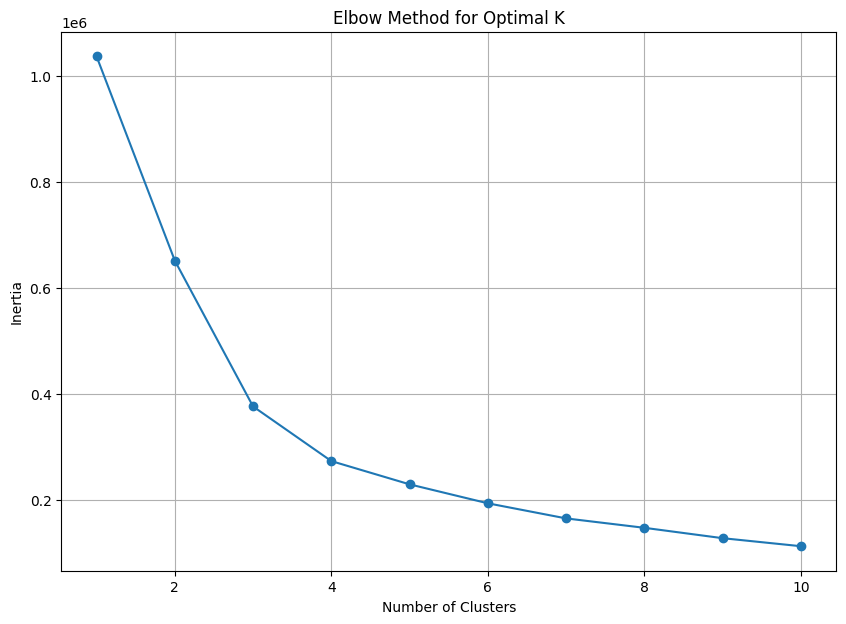

In [37]:
# Elbow grafiğini çizdirin
plt.figure(figsize=(10, 7))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# Optimal küme 
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)  # n_init parametresini açıkça belirtiyoruz
clusters = kmeans.fit_predict(pca_features)

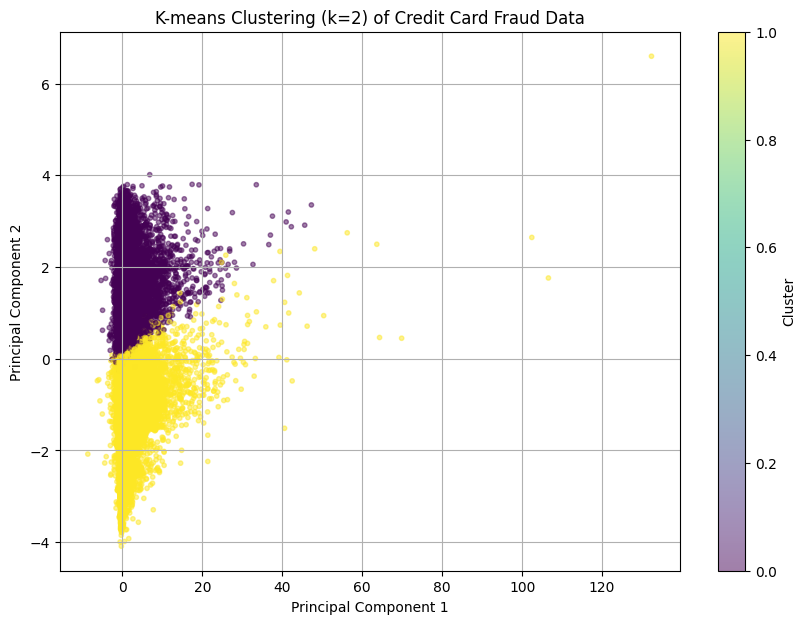

In [38]:
# Kümelemeyi görselleştirme
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=clusters, s=10, alpha=0.5, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-means Clustering (k={optimal_k}) of Credit Card Fraud Data')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [40]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(pca_features, clusters)
print(f'Davies-Bouldin Score for k={optimal_k}: {db_score}')


Davies-Bouldin Score for k=2: 0.7040633563236232
